# Week 5

## Sales Prediction

- Build a muliple linear model which predicts sales based on the money spent on different platforms for marketing

### Loading market-sales data

In [66]:
import pandas as pd
marketing_dataframe = pd.read_csv("data/marketing-sales.csv")
print(marketing_dataframe.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


### Data Cleaning and Data Pre-processing
- Fix Data Types
- Normalization
- Handle missing data
- Perform Data Transformation

In [67]:
# filling missing values with mean
marketing_dataframe = marketing_dataframe.fillna(marketing_dataframe.mean())

### Exploratory Data Analysis

<Figure size 1000x500 with 0 Axes>

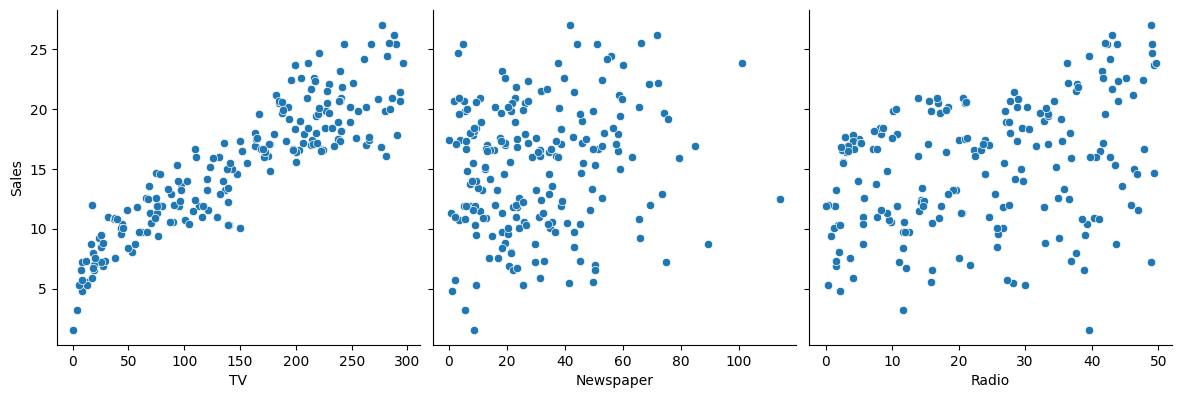

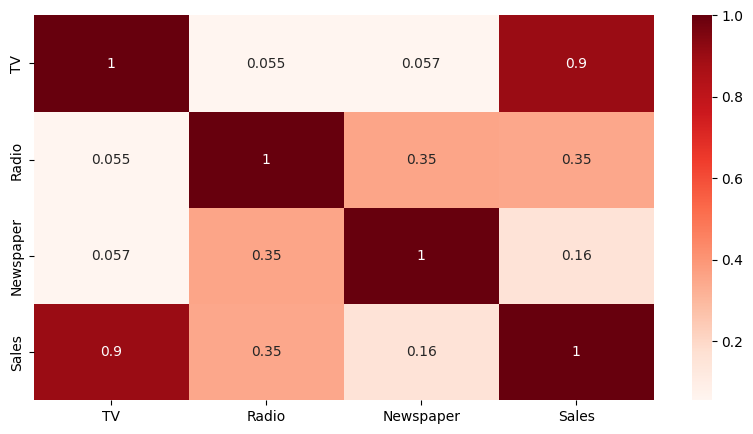

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scattered plot between tv, newspaper, and radio with sales
plt.figure(figsize=(10,5))
sns.pairplot(marketing_dataframe, x_vars=["TV", "Newspaper", "Radio"], y_vars="Sales", height=4, aspect=1, kind="scatter")
plt.show()

# heatmap to find out the correlation between tv, newspaper, radio and sales
plt.figure(figsize=(10,5))
sns.heatmap(marketing_dataframe.corr(), cmap="Reds", annot=True)
plt.show()

### Building Multiple Linear Regression Model
- TV, Radio, Newspaper are features (x1, x2, x3)
- Sales will be Label(y)

This means, we will see the how much target sales will change according to multiple indepedent variables such as TV, Radio, Newspaper

**Equation:** *y = beta0 + beta1 * x1 + beta2 * x2 + ... + betan * xn + errorterm*

#### Preparing train_test dataset

In [69]:
from sklearn.model_selection import train_test_split

x = marketing_dataframe[["TV", "Radio", "Newspaper"]]
y = marketing_dataframe["Sales"]

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)


#### Building model

In [70]:
from sklearn.linear_model import LinearRegression

# inititalizing the model
sales_model = LinearRegression()
# Fitting the data to the model
sales_model.fit(x_train, y_train)

# printing the coefficients
print(f"Coefficients: {sales_model.coef_}")
print(f"Intercepts: {sales_model.intercept_}")


Coefficients: [ 0.05513391  0.11517294 -0.00072085]
Intercepts: 4.433592618158764


#### Evaluate Model

In [71]:
from sklearn.metrics import mean_squared_error

# making predictions
y_pred = sales_model.predict(x_test)

# Evaluting the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.4709040397745468


#### Inferences: using model in real-world

In [72]:
import numpy as np
import warnings

# Suppressing warnings globally
warnings.filterwarnings("ignore", category=UserWarning)

# Single data point for inference
tv_ad_cost = 200
radio_ad_cost = 25
news_ad_cost = 40

# creating 1x array_len matrix (column matrix)
single_data = np.array([tv_ad_cost, radio_ad_cost, news_ad_cost]).reshape(1, 3)
print(single_data)
# predicting sales for the single data point
single_predictions = sales_model.predict(single_data)

# Displaying the predictions
print(f"Advertising Budget (TV: {tv_ad_cost}, Radio: {radio_ad_cost}, Newspaper: {news_ad_cost}) -> Predicted Sales: {single_predictions[0]:.2f}")

[[200  25  40]]
Advertising Budget (TV: 200, Radio: 25, Newspaper: 40) -> Predicted Sales: 18.31


#### Home work and assignment(in week*_assignment.ipynb)

## Classification
### Gaussian Naive Bayes Classifier

In [73]:
from sklearn.datasets import load_iris
from IPython.display import display

# Loading the Iris dataset
iris = load_iris()
# creating new dataframe from iris data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target
iris_df["species"] = iris_df["species"].map({
    0: "setosa", 1: "versicolor", 2: "virginica"
})

display(iris_df.head())
X = iris_df[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)'	,'petal width (cm)']]  
y = iris_df['species']  # Target (species: 0= setosa, 1 = versicolor, 2 = virginica)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### split data into test and train dataset

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train the GNB Classifier

In [75]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

#### Making predictions

In [76]:
# make predictions
y_pred = gnb.predict(X_test)

#### Evaluate the model

In [77]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"\nClassification Report:\n",)
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Clustering Algorithms
- k-means
- Meanshift
- DBSCAN

### K-means Clustering Algorithm
- **choose the number of Clusters (k):** We decide how many cluster we want the data to be divided into
- **Initialize Cluster Centers:** Randomly select k points from the data as initial cluster centers (also called centroids)
- **Update Centroids:** For each cluster, compute the new centroids as the average of all points assigned to that cluster
- **Repeat:** Reassign points to cluster based on the update centroids and recompute the centroids. This process is repeated until the centroids stop changing significantly or a maximum number of iterations is reached.
- Finally, the algorithm returns the final clusters and their centroids, after n number of iterations (max_iter)

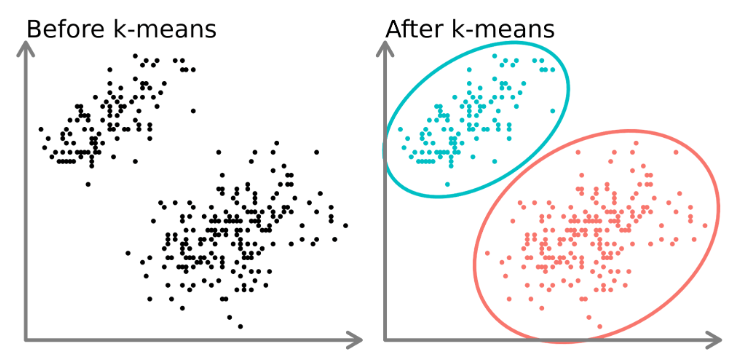

In [78]:
import pandas as pd

housing = pd.read_csv("data/housing.csv",\
                      usecols=["longitude", "latitude", "median_house_value"])

print(housing.head())

   longitude  latitude  median_house_value
0    -122.23     37.88            452600.0
1    -122.22     37.86            358500.0
2    -122.24     37.85            352100.0
3    -122.25     37.85            341300.0
4    -122.25     37.85            342200.0


#### Plotting scattered plot to visualize the data

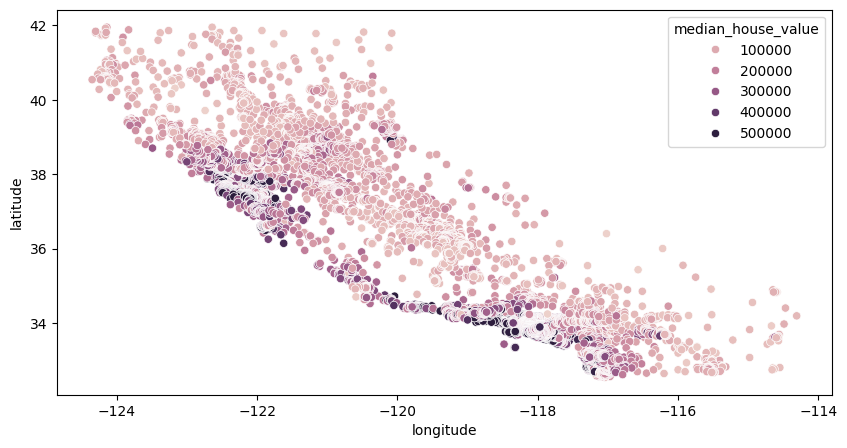

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(data = housing, x = "longitude", y = "latitude", hue = "median_house_value")
plt.show()

#### Splitting Train/Test and Normalize Data

In [80]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(housing[['latitude', 'longitude']], housing[['median_house_value']], test_size=0.33, random_state=0)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

#### Fit the data to the K-means model and plot the clusters into scattered plot

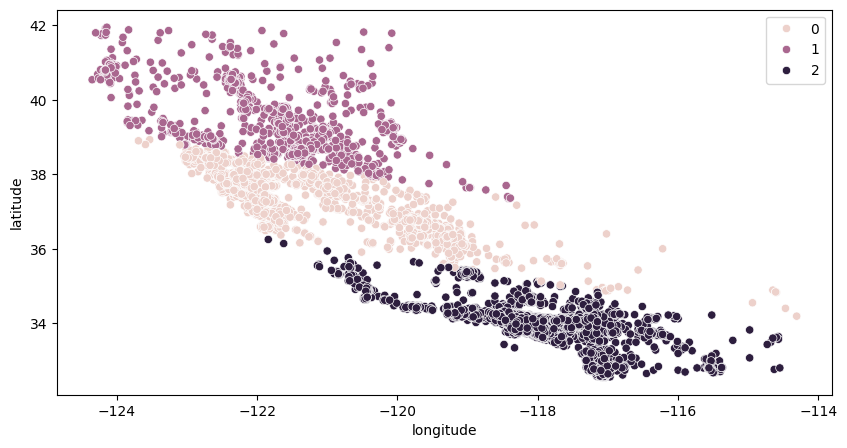

In [81]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state=0, n_init="auto")
kmeans.fit(X_train_norm)

plt.figure(figsize=(10,5))
sns.scatterplot(
    data=X_train,
    x="longitude",
    y="latitude",
    hue=kmeans.labels_
)

plt.show()

#### Evaluate Clustering model using Silhouette Score (lower score represents a better fit)

In [82]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_train_norm, kmeans.labels_, metric="euclidean")
print(sil_score)

0.7499371920703546
